# Predicting TV, Radio, Newspapaer Sales using Linear Regression 

## Import libraries
We’ll import the numpy and pandas library in the Jupyter notebook and read the data using pandas.

In [3]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
df = pd.read_csv("https://raw.githubusercontent.com/cpluz-shrijayan/Sales-prediction-using-Regression/main/Company_data.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Understand the data
Let’s perform some tasks to understand the data like shape, info, and describe.

The shape of our dataset is,

In [8]:
# Shape of our dataset
df.shape

(200, 4)

Using the info, we can see whether there are any null values in the data. If yes, then we have to do some data manipulation.

In [ ]:
# Info our dataset
df.info()

As we can observe, there are no null values present in the data.

Using describe, we’ll see whether there is any sudden jump in the data’s values.

In [9]:
# Describe our dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualizing the data
Let’s now visualize the data using the matplolib and seaborn library. We’ll make a pairplot of all the columns and see which columns are the most correlated to Sales.

It is always better to use a scatter plot between two numeric variables. The pairplot for the above code looks like,

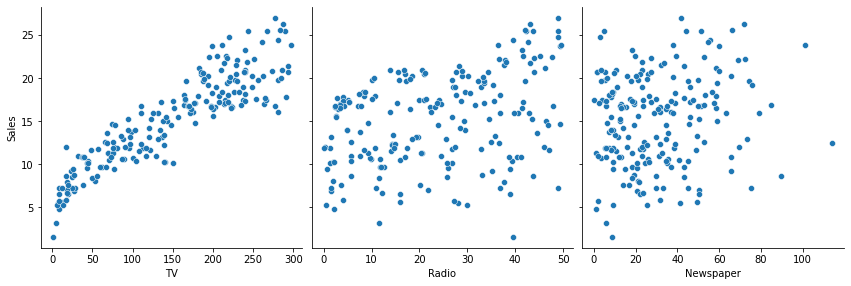

In [10]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

If we cannot determine the correlation using a scatter plot, we can use the seaborn heatmap to visualize the data.

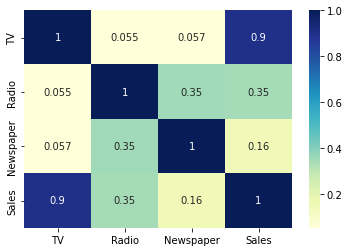

In [11]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

As we can see from the above graphs, the TV column seems most correlated to Sales.



Let’s perform the simple linear regression model using TV as our feature variable.

Performing Simple Linear Regression

Equation of simple linear regression

y = c + mX

In our case:

y = c + m * TV

The m values are known as model coefficients or model parameters.

## We’ll perform simple linear regression in four steps.

1. Create X and y
2. Create Train and Test set
3. Train your model
4. Evaluate the model

Create X and y

First, we’ll assign our feature variable/column TV as X and our target variable Sales as y.

To generalize,

The independent variable represents X, and y represents the target variable in a simple linear regression model.

In [16]:
# Creating X and y
X = df['TV']
y = df['Sales']

## Create Train and Test sets

We need to split our variables into training and testing sets. Using the training set, we’ll build the model and perform the model on the testing set. We’ll divide the training and testing sets into a 7:3 ratio, respectively.

We’ll split the data by importing train_test_split from the sklearn.model_selection library.

In [17]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

Let’s take a look at the training dataset,

X_train data looks like this after splitting.

In [18]:
# Take a look at the train dataset
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

y_train data looks like this after splitting.

In [19]:
# Take a look at the train dataset
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

Building and training the model

Using the following two packages, we can build a simple linear regression model.

*   statsmodel
*   sklearn

First, we’ll build the model using the statsmodel package. To do that, we need to import the statsmodel.api library to perform linear regression.

By default, the statsmodel library fits a line that passes through the origin. But if we observe the simple linear regression equation y = c + mX, it has an intercept value as c. So, to have an intercept, we need to add the add_constant attribute manually.

In [20]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

Once we’ve added constant, we can fit the regression line using OLS (Ordinary Least Square) method present in the statsmodel. After that, we’ll see the parameters, i.e., c and m of the straight line.

In [21]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    6.948683
TV       0.054546
dtype: float64

Let’s see the summary of all the different parameters of the regression line fitted like R², probability of F-statistic, and p-value.

In [22]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.52e-52
Time:                        14:49:33   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, the statistics we are mainly concerned with to determine whether the model is viable or not are:

1. The coefficients and its p-value(significance)
2. R-squared value
3. F-statistic and its significance

1. The coefficient for TV is 0.054, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.

We have to make sure that the p-value should always be less for the coefficient to be significant

2. R-squared value is 0.816, which means that 81.6% of the Sales variance can be explained by the TV column using this line.

3. Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

Since the fit is significant, let’s go ahead and visualize how well the straight-line fits the scatter plot between TV and Sales columns.

From the parameters, we got the values of the intercept and the slope for the straight line. The equation of the line is,

Sales = 6.948 + 0.054 * TV

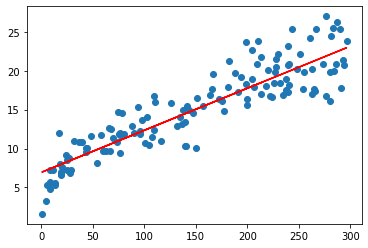

In [23]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

This is how we build a simple linear regression model using training data. Now before evaluating the model on test data, we have to perform residual analysis.

## Residual Analysis

One of the major assumptions of the linear regression model is the error terms are normally distributed.

Error = Actual y value - y predicted value

Now from the dataset,
We have to predict the y value from the training dataset of X using the predict attribute. After that, we’ll create the error terms(Residuals) from the predicted data.

In [25]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

Now, let’s plot the histogram of the residuals and see whether it looks like normal distribution or not.

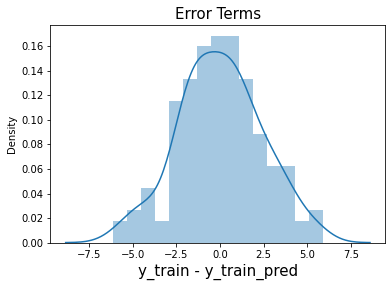

In [26]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

As we can see, the residuals are following the normal distribution graph with a mean 0.

Now, make sure that the residuals are not following any specific pattern.

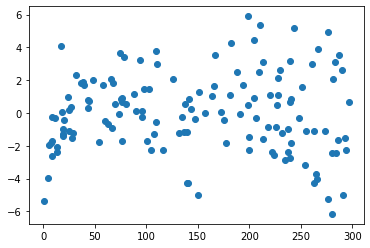

In [28]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

Since the Residuals follow a normal distribution and do not follow any specific pattern, we can use the linear regression model we have built to evaluate test data.

## Predictions on the Test data or Evaluating the model
Now that we have fitted the regression line on our train dataset, we can make some predictions to the test data. Similar to the training dataset, we have to add_constant to the test data and predict the y values using the predict attribute present in the statsmodel.

In [27]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

Now, let’s calculate the R² value for the above-predicted y-values. We can do that by merely importing the r2_score library from sklearn.metrics package.

In [29]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.792103160124566

The R² value by using the above code = 0.792

If we can remember from the training data, the R² value = 0.815

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

Let’s visualize the line on the test data.

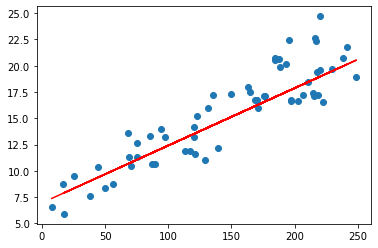

In [30]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

This is how we build a linear regression model using the statsmodel package.

Apart from the statsmodel, we can build a linear regression model using sklearn. Using the linear_model library from sklearn, we can make the model.

Similar to statsmodel, we’ll split the data into train and test.

In [31]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

For simple linear regression, we need to add a column to perform the regression fit properly.

In [32]:

# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


The shape of X_train before adding a column is (140, ).
The shape of X for train and test data is (140, 1).

Now, let’s fit the line to the plot importing the LinearRegression library from the sklearn.linear_model.

In [34]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [35]:

# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


The straight-line equation we get for the above values is,
Sales = 6.948 + 0.054 * TV
If we observe, the equation we got here is the same as the one we got in the statsmodel.

After that, we’ll make the predictions and on the data and evaluate the model by comparing the R² values.

In [36]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662


The R² values of the train and test data are
R² train_data = 0.816
R² test_data = 0.792

Same as the statesmodel, the R² value on test data is within 5% of the R² value on training data. We can apply the model to the unseen test set in the future.

Conclusion
As we have seen, we can build a linear regression model using either a statsmodel or sklearn.

We have to make sure to follow these five steps to build the simple linear regression model:

1. Reading and understanding the data
2. Visualizing the data
3. Performing simple linear regression
4. Residual analysis
5. Predictions on the test set